In [62]:
!pip install numpy-stl
!pip install numpy
!pip install pytest

1.Parametrik silindir tanımlamak

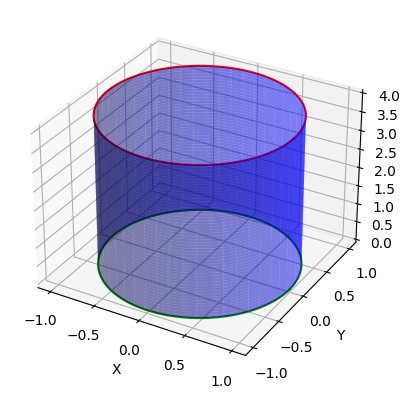

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def create_cylinder(length, radius, num_points=100):
    # Create the points for the side surface of the cylinder
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(0, length, num_points)
    Z, Theta = np.meshgrid(z, theta)
    X = radius * np.cos(Theta)
    Y = radius * np.sin(Theta)

    # Create the points for the two circular faces of the cylinder
    circle_points = num_points
    theta = np.linspace(0, 2 * np.pi, circle_points)
    x_top = radius * np.cos(theta)
    y_top = radius * np.sin(theta)
    x_bottom = x_top
    y_bottom = y_top

    # Plot the cylinder
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color='b', alpha=0.5)  # Side surface
    ax.plot(x_top, y_top, np.full_like(x_top, length), color='r')  # Top face
    ax.plot(x_bottom, y_bottom, np.zeros_like(x_bottom), color='g')  # Bottom face

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Example usage:
create_cylinder(length=4, radius=1)

2.Parametrik küp tanımlamak

In [49]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


def create_cube(length):
  # Create axis
  axes = [length , length, length]
  # Create Data
  data = np.ones(axes, dtype=np.bool)
  # Control Transparency
  alpha = 0.9
  # Control colour
  colors = np.empty(axes + [4], dtype=np.float32)
  colors[:] = [0, 1, 1, alpha] # red
  # Plot figure
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Voxels is used to customizations of the
  # sizes, positions and colors.
  ax.voxels(data, facecolors=colors)


create_square(length=2)

<ipython-input-44-c496eef5e194>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


(array([[[ True,  True],
         [ True,  True]],
 
        [[ True,  True],
         [ True,  True]]]),
 array([[[[0. , 1. , 1. , 0.9],
          [0. , 1. , 1. , 0.9]],
 
         [[0. , 1. , 1. , 0.9],
          [0. , 1. , 1. , 0.9]]],
 
 
        [[[0. , 1. , 1. , 0.9],
          [0. , 1. , 1. , 0.9]],
 
         [[0. , 1. , 1. , 0.9],
          [0. , 1. , 1. , 0.9]]]], dtype=float32))

Merge’in two 3D object last vertex or firts vertex postion.

<ipython-input-51-c496eef5e194>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.ones(axes, dtype=np.bool)


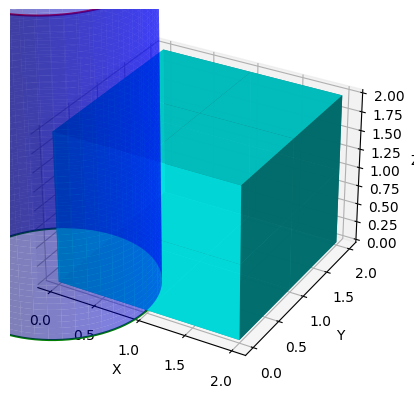

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from stl import mesh

def create_cylinder(length, radius, num_points=100):
    # Create the points for the side surface of the cylinder
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(0, length, num_points)
    Z, Theta = np.meshgrid(z, theta)
    X = radius * np.cos(Theta)
    Y = radius * np.sin(Theta)

    # Create the points for the two circular faces of the cylinder
    circle_points = num_points
    theta = np.linspace(0, 2 * np.pi, circle_points)
    x_top = radius * np.cos(theta)
    y_top = radius * np.sin(theta)
    x_bottom = x_top
    y_bottom = y_top

    return X, Y, Z, x_top, y_top, x_bottom, y_bottom

def create_square(length):
    # Create axis
    axes = [length, length, length]
    # Create Data
    data = np.ones(axes, dtype=np.bool)
    # Control Transparency
    alpha = 0.9
    # Control colour
    colors = np.empty(axes + [4], dtype=np.float32)
    colors[:] = [0, 1, 1, alpha]  # red
    return data, colors

# Create the cylinder and square data
cylinder_data = create_cylinder(length=4, radius=1)
square_data, square_colors = create_square(length=2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cylinder
ax.plot_surface(*cylinder_data[:3], color='b', alpha=0.5)  # Side surface
ax.plot(cylinder_data[3], cylinder_data[4], np.full_like(cylinder_data[3], 4), color='r')  # Top face
ax.plot(cylinder_data[5], cylinder_data[6], np.zeros_like(cylinder_data[5]), color='g')  # Bottom face

# Plot the square
ax.voxels(square_data.data, facecolors=square_colors)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Save the 3D plot as an STL file
combined_mesh = mesh.Mesh(combined_mesh.data)
combined_mesh.save('combined.stl')
plt.show()



#TEST
Burada ise unit testler ile ilk 2 fonksiyonda verilerin boyut kontrolünü ve son fonksiyonda ise o figürün oluşup oluşmadığını test ediyorum


In [75]:



%%file test_list.py


import pytest
import numpy as np
import matplotlib.pyplot as plt
def create_cylinder(length, radius, num_points=100):
    # Create the points for the side surface of the cylinder
    theta = np.linspace(0, 2 * np.pi, num_points)
    z = np.linspace(0, length, num_points)
    Z, Theta = np.meshgrid(z, theta)
    X = radius * np.cos(Theta)
    Y = radius * np.sin(Theta)

    # Create the points for the two circular faces of the cylinder
    circle_points = num_points
    theta = np.linspace(0, 2 * np.pi, circle_points)
    x_top = radius * np.cos(theta)
    y_top = radius * np.sin(theta)
    x_bottom = x_top
    y_bottom = y_top

    return X, Y, Z, x_top, y_top, x_bottom, y_bottom

def create_square(length):
    # Create axis
    axes = [length, length, length]
    # Create Data
    data = np.ones(axes, dtype=np.bool)
    # Control Transparency
    alpha = 0.9
    # Control colour
    colors = np.empty(axes + [4], dtype=np.float32)
    colors[:] = [0, 1, 1, alpha]  # red
    return data, colors

# Define test functions
def test_create_cylinder():
    cylinder_data = create_cylinder(length=4, radius=1)
    assert len(cylinder_data) == 7


def test_create_square():
    square_data, square_colors = create_square(length=3)
    assert len(square_data) == 3
    assert len(square_colors) == 3


def test_plotting():
         cylinder_data = create_cylinder(length=4, radius=1)
         fig = plt.figure()
         # Check if the plot is not empty
         assert fig is not None





Overwriting test_list.py


In [76]:
!python -m pytest test_list.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.2, pluggy-1.3.0
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                                                  

test_list.py ...                                                                             [100%]

======================================== 3 passed in 0.88s =========================================
